In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog
import time
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from scipy.ndimage.measurements import label
from HelperFunctions import *

%matplotlib inline

In [2]:
#Training and Testing Data
car_images_path = ["vehicles/GTI_Far/image*","vehicles/GTI_Left/image*","vehicles/GTI_MiddleClose/image*","vehicles/GTI_Right/image*","vehicles/KITTI_extracted/*"]
noncar_images_path = ["non-vehicles/Extras/*","non-vehicles/GTI/*"]

cars = []
noncar = []

def loadCarImages(paths,cars):
    cars = []
    for path in paths:
        images = glob.glob(path)
        for image in images:
            cars.append(image)
    return cars

def loadNonCarImages(paths,noncar):
    noncar = []
    for path in paths:
        images = glob.glob(path)
        for image in images:
            noncar.append(image)
    return noncar

# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    example_img = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    # Return data_dict
    return data_dict  


def displaySampleData(cars, noncars,data_info):
    print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
    print('of size: ',data_info["image_shape"], ' and data type:', 
          data_info["data_type"])

    # Just for fun choose random car / not-car indices and plot example images   
    car_ind = np.random.randint(0, len(cars))
    notcar_ind = np.random.randint(0, len(noncar))

    # Read in car / not-car images
    car_image = mpimg.imread(cars[car_ind])
    notcar_image = mpimg.imread(noncar[notcar_ind])

    # Plot the examples
    fig = plt.figure()
    plt.subplot(121)
    plt.imshow(car_image)
    plt.title('Example Car Image')
    plt.subplot(122)
    plt.imshow(notcar_image)
    plt.title('Example Not-car Image')
    plt.show()

Your function returned a count of 500  cars and 500  non-cars
of size:  (64, 64, 3)  and data type: float32


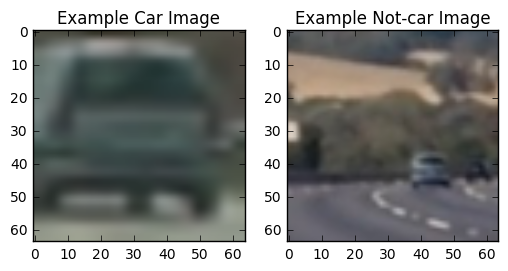

In [3]:
cars = loadCarImages(car_images_path,cars)
noncar = loadNonCarImages(noncar_images_path,noncar)

sample_size = 500
cars = cars[0:sample_size]
noncar = noncar[0:sample_size]

data_info = data_look(cars, noncar)

displaySampleData(cars, noncar, data_info)

In [4]:
# Read in cars and notcars
cars = glob.glob("vehicles/*/*.png")
notcars = glob.glob("non-vehicles/*/*.png")

print(len(cars))
print(len(notcars))
test_img = mpimg.imread('cars-image.jpg')
img_shape = test_img.shape


color_space = 'HLS' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 8  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [int(img_shape[0] * 0.5), img_shape[0]] # Min and max in y to search in slide_window()




8792
8968


In [5]:
car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

print(len(car_features))
print(len(notcar_features))

8792
8968


In [6]:
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        

# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)

# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

In [7]:
# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)

X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

In [8]:
print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

# Use a linear SVC 
svc = SVC(C=1.0, probability=True)
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()

Using: 8 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 5568
1326.13 Seconds to train SVC...
Test Accuracy of SVC =  0.9924


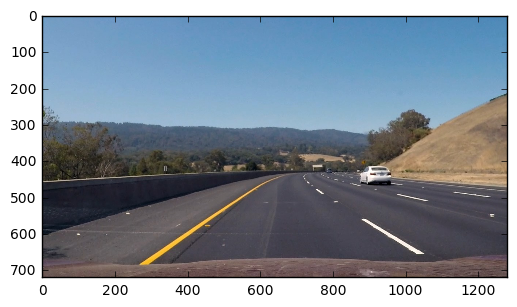

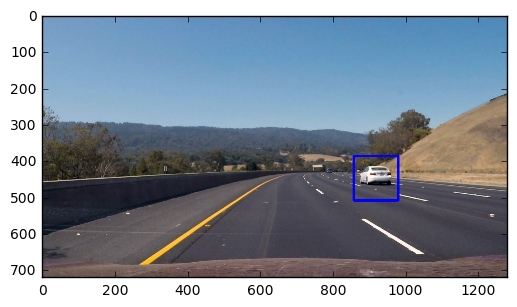

In [9]:

    
image_name = glob.glob("test_images/*")[2]
image = plt.imread(image_name)
plt.imshow(image)
plt.show()

# image = mpimg.imread('bbox-example-image.jpg')
draw_img = draw_bounding_boxes(image,svc,X_scaler)
plt.imshow(draw_img)
plt.show()

In [10]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [11]:
def process(image):
    return draw_bounding_boxes(image,svc,X_scaler)

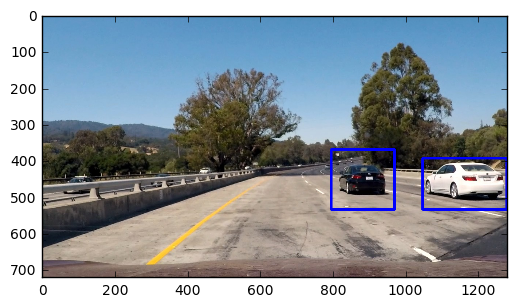

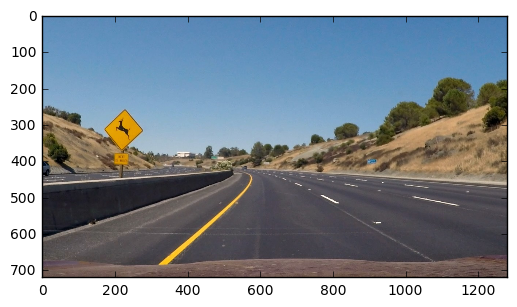

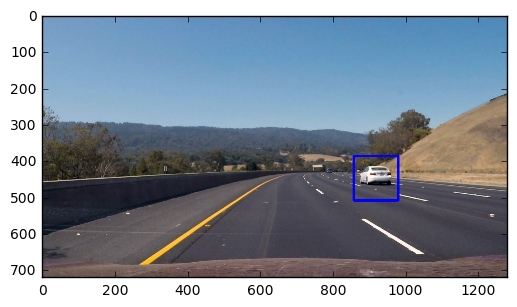

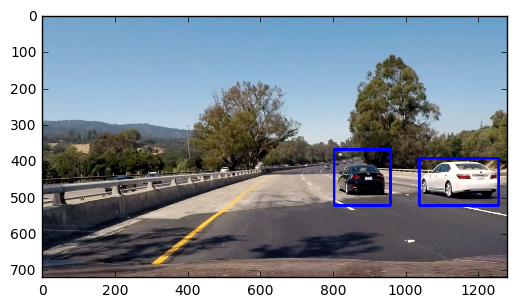

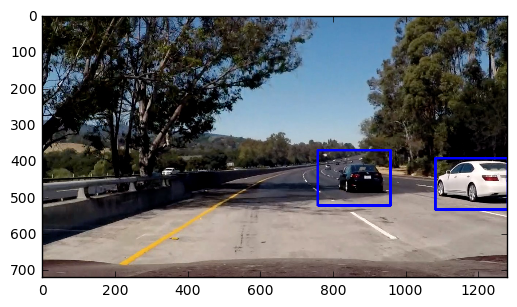

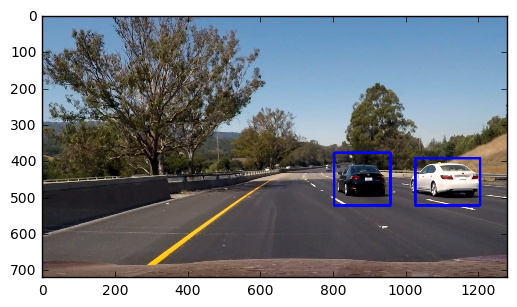

In [12]:
for image_name in glob.glob("test_images/*"):
    test_img = plt.imread(image_name)
    test_img = process(test_img)
    plt.imshow(test_img)
    plt.show()

In [ ]:
output = 'p5_test.mp4'
clip1 = VideoFileClip("test_video.mp4")
output_clip = clip1.fl_image(process) #NOTE: this function expects color images!!
%time output_clip.write_videofile(output, audio=False)

[MoviePy] >>>> Building video p5_test.mp4
[MoviePy] Writing video p5_test.mp4




  0%|                                                                                           | 0/39 [00:00<?, ?it/s]

  3%|██                                                                              | 1/39 [02:06<1:20:02, 126.37s/it]

  5%|████                                                                            | 2/39 [04:13<1:17:58, 126.45s/it]

  8%|██████▏                                                                         | 3/39 [06:18<1:15:46, 126.30s/it]

 10%|████████▏                                                                       | 4/39 [08:25<1:13:38, 126.23s/it]

 13%|██████████▎                                                                     | 5/39 [10:31<1:11:35, 126.33s/it]

 15%|████████████▎                                                                   | 6/39 [12:38<1:09:34, 126.51s/it]

 18%|██████████████▎                                                                 | 7/39 [14:46<1:07:38, 126.84s/it]

 21%|████████████████▍        

In [ ]:
output = 'project_video_output.mp4'
clip1 = VideoFileClip("project_video.mp4")
output_clip = clip1.fl_image(process) #NOTE: this function expects color images!!
%time output_clip.write_videofile(output, audio=False)